# Introduction

### Importing Required Libraries

In [ ]:
import fastbook

In [ ]:
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

### Getting Images And Fine Tuning

In [ ]:
def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct = 0.2, seed = 42,
    label_func = is_cat, item_tfms = Resize(224)
)

learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 122MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.170996,0.022625,0.006766,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.050112,0.029193,0.004736,00:53


### Testing In Cat Image

In [8]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [16]:
def predictor(img):
  is_cat, _, probs = learn.predict(img)
  print(f'Is cat ? : {is_cat}, Probability : {probs[1].item():.6f}')

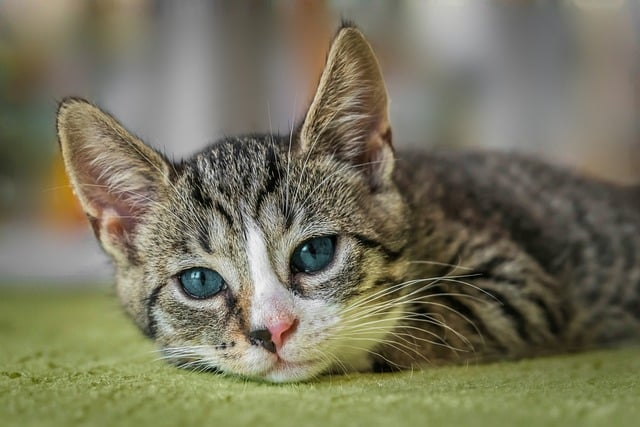

In [15]:
img = PILImage.create(uploader.data[0])
img

In [17]:
predictor(img)

Is cat ? : True, Probability : 1.000000


### Testing In Dog Image

In [18]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

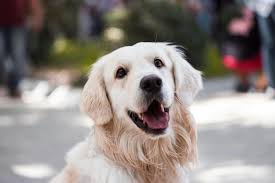

In [20]:
img = PILImage.create(uploader.data[0])
img

In [21]:
predictor(img)

Is cat ? : False, Probability : 0.000020
